In [2]:
#importing and preprocessing dataset 
from sklearn.datasets import load_iris
import pandas as pd 

In [9]:
data= load_iris()
df = pd.DataFrame(load_iris().data,columns=data.feature_names)
df['species'] = data.target
print("Dataset Shape:", df.shape)
print("First few rows:\n", df.head(150))



df.info()
df.isnull().sum()

Dataset Shape: (150, 5)
First few rows:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1         

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [17]:
df['species']=data.target
df=df.drop(columns=['species'])
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [18]:
#X = df.drop(['species'], axis=1)
#only Input is required as it is Unsupervised Learning

X = df

In [1]:
from sklearn.cluster import KMeans  #Import K means clustering related Library

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters for the 3 classes in Iris
kmeans.fit(X)
df['cluster'] = kmeans.labels_    #to add a column named Cluster into the Dataframe and labelled Using Kmeans

print("\nLabels Assigned to Data:\n", kmeans.labels_)
print("\nCluster Centers:\n", kmeans.cluster_centers_)
print("\nFirst few rows with clusters:\n", df.head())


D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Labels Assigned to Data:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]

Cluster Centers:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]

First few rows with clusters:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   


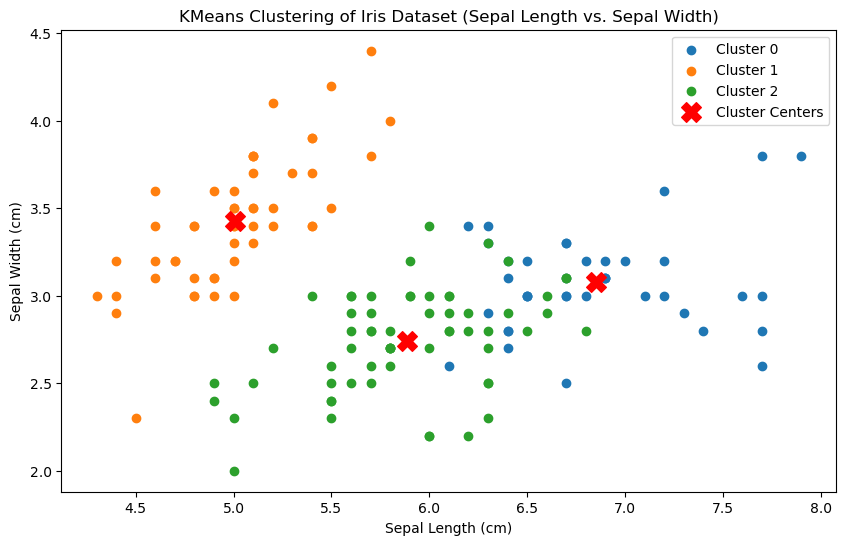

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for cluster in range(3):  # 3 clusters
    cluster_points = df[df['cluster'] == cluster]
    plt.scatter(
        cluster_points['sepal length (cm)'],
        cluster_points['sepal width (cm)'],
        label=f'Cluster {cluster}'
    )
# Mark the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0], centers[:, 1],
    c='red', s=200, marker='X',
    label='Cluster Centers'
)

# Add labels and legend
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('KMeans Clustering of Iris Dataset (Sepal Length vs. Sepal Width)')
plt.legend()
plt.show()

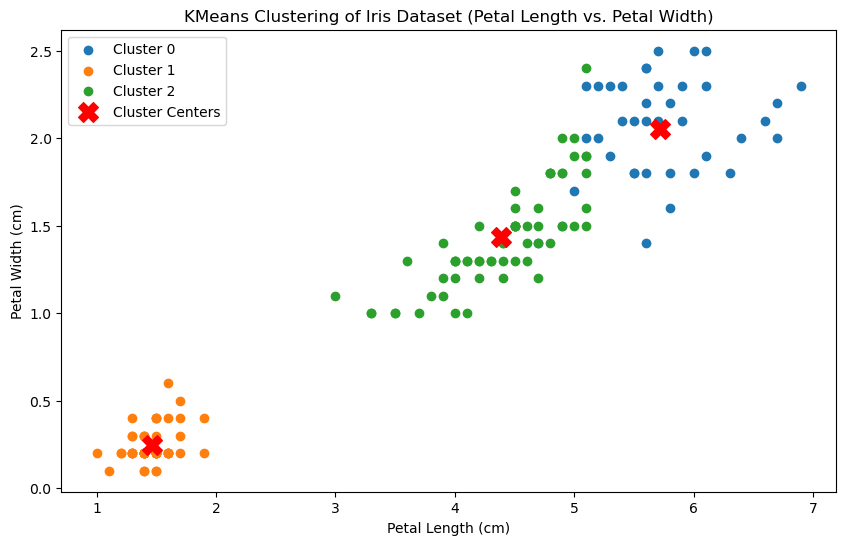

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot each cluster's points
for cluster in range(3):  # Assuming 3 clusters
    cluster_points = df[df['cluster'] == cluster]
    plt.scatter(
        cluster_points['petal length (cm)'],  # Correct feature for x-axis
        cluster_points['petal width (cm)'],   # Correct feature for y-axis
        label=f'Cluster {cluster}'
    )

# Plot the cluster centers (only the relevant petal features)
centers = kmeans.cluster_centers_[:, 2:4]  # Slice for 'petal length' and 'petal width'
plt.scatter(
    centers[:, 0], centers[:, 1],
    c='red', s=200, marker='X',
    label='Cluster Centers'
)

# Add correct labels and legend
plt.xlabel('Petal Length (cm)')  # Corrected label
plt.ylabel('Petal Width (cm)')   # Corrected label
plt.title('KMeans Clustering of Iris Dataset (Petal Length vs. Petal Width)')
plt.legend()
plt.show()


In [29]:
import seaborn as sns

# Add a cluster column to df (if not done already)
df['cluster'] = kmeans.labels_


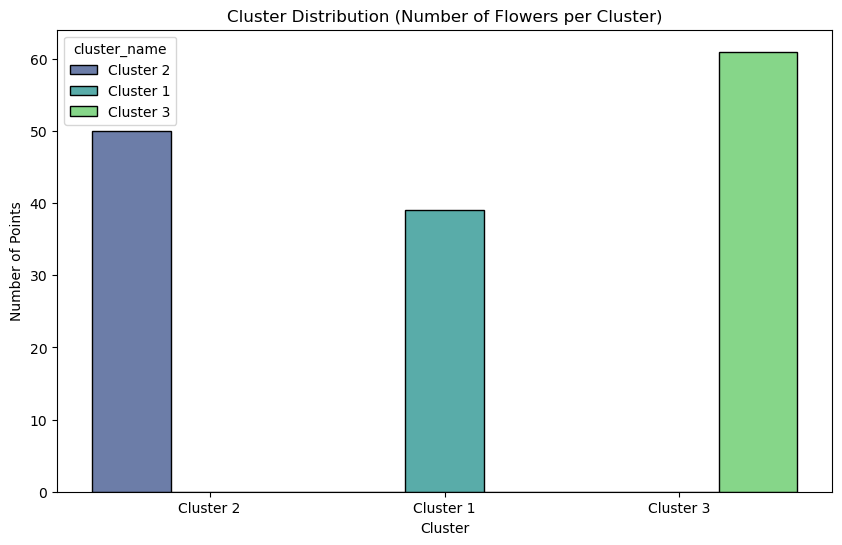

In [26]:
cluster_labels = {0: "Cluster 1", 1: "Cluster 2", 2: "Cluster 3"}
df['cluster_name'] = df['cluster'].map(cluster_labels)

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='cluster_name', hue='cluster_name', palette='viridis', multiple="dodge")
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.title('Cluster Distribution (Number of Flowers per Cluster)')
plt.show()

In [32]:
#performing Hierarchicla Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [40]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
plt.figure(figsize=(10, 6))
linked = linkage(scaled_data, method='ward')  # 'ward' minimizes variance within clusters


<Figure size 1000x600 with 0 Axes>

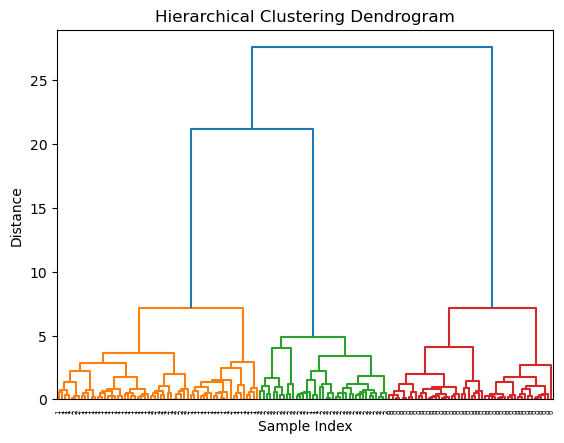

In [39]:
# Plot the dendrogram
dendrogram(linked, 
           orientation='top', 
           labels=data.target,  # Using true labels for visualization purposes
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        1  
Cluster Labels:
cluster
0    61
1    50
2    39
Name: count, dtype: int64


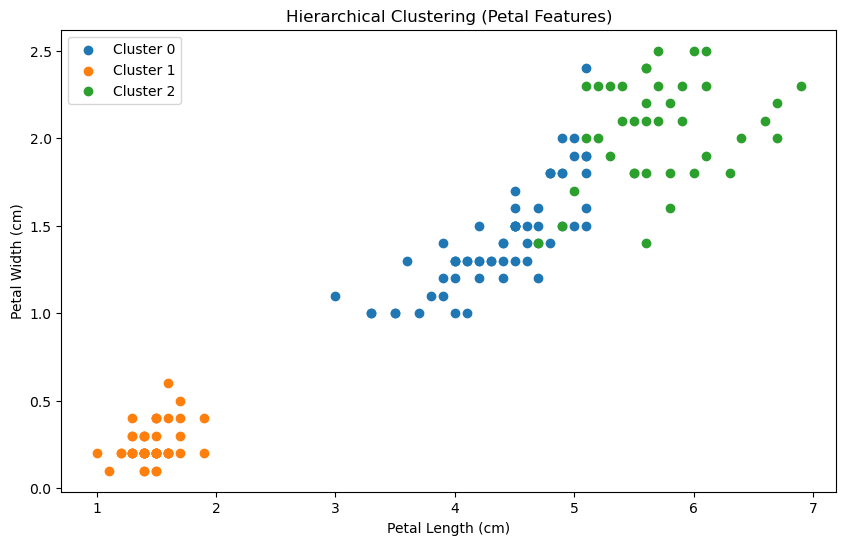

In [42]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = agg_clustering.fit_predict(scaled_data)

# Add cluster labels to the dataframe
df['cluster'] = labels

# Print cluster assignment and sample output
print(df.head())
print(f"Cluster Labels:\n{df['cluster'].value_counts()}")

# Visualize clusters (e.g., petal length vs. petal width)
plt.figure(figsize=(10, 6))
for cluster in range(3):  # Assuming 3 clusters
    cluster_points = df[df['cluster'] == cluster]
    plt.scatter(
        cluster_points['petal length (cm)'],
        cluster_points['petal width (cm)'],
        label=f'Cluster {cluster}'
    )
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Hierarchical Clustering (Petal Features)')
plt.legend()
plt.show()
